Colonnes dans day_df: Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')
Colonnes dans day_df_filtered: Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')
Missing values in day_df:
Series([], dtype: int64)

Missing values in hour_df:
Series([], dtype: int64)
Number of outliers filtered using percentiles: 16


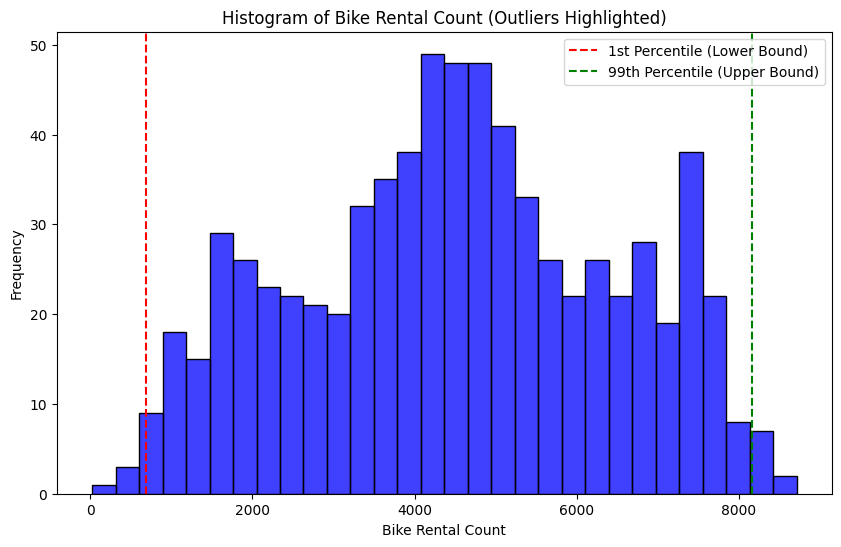

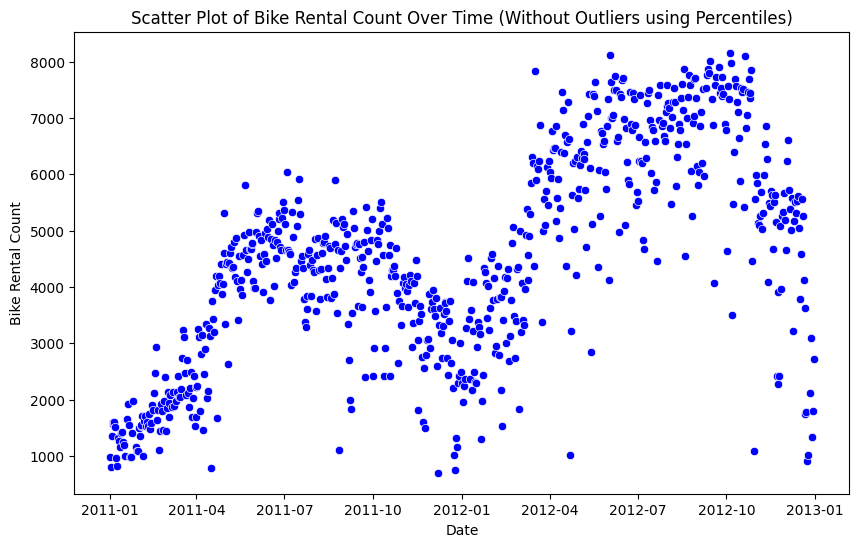

In [2]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Path to the zip file
zip_file_path = r'C:\Users\syssa\PycharmProjects\premier projet\archive.zip'

# Extract the files
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(r'C:\Users\syssa\PycharmProjects\premier projet\extracted_files')

# Read the CSV files
day_df = pd.read_csv(r'C:\Users\syssa\PycharmProjects\premier projet\extracted_files\day.csv')
hour_df = pd.read_csv(r'C:\Users\syssa\PycharmProjects\premier projet\extracted_files\hour.csv')

# Vérifiez les colonnes dans day_df
print("Colonnes dans day_df:", day_df.columns)
# Pour l'exemple, utilisons toutes les données sans filtrage
day_df_filtered = day_df.copy()  

# Vérifiez les colonnes après filtrage
print("Colonnes dans day_df_filtered:", day_df_filtered.columns)

# Vérifiez si la colonne 'dteday' existe
if 'dteday' in day_df_filtered.columns:
    day_df_filtered['dteday'] = pd.to_datetime(day_df_filtered['dteday'])
else:
    print("'dteday' n'existe pas dans day_df_filtered.")
    # Convert 'dteday' to datetime format
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Convert 'hr' to 12-hour format with AM/PM notation for hour_df
if 'hr' in hour_df.columns:
    hour_df['hour_12'] = hour_df['hr'] % 12
    hour_df['hour_12'] = hour_df['hour_12'].replace(0, 12)
    hour_df['period'] = np.where(hour_df['hr'] < 12, 'AM', 'PM')

# Drop duplicates
day_df = day_df.drop_duplicates()
hour_df = hour_df.drop_duplicates()

# Handle missing values in day_df
missing_values_day = day_df.isnull().sum()
missing_values_day = missing_values_day[missing_values_day > 0]
print("Missing values in day_df:")
print(missing_values_day)

# Handle missing values in hour_df
missing_values_hour = hour_df.isnull().sum()
missing_values_hour = missing_values_hour[missing_values_hour > 0]
print("\nMissing values in hour_df:")
print(missing_values_hour)

# Détection des outliers avec les percentiles
lower_bound = day_df['cnt'].quantile(0.01)
upper_bound = day_df['cnt'].quantile(0.99)

# Filtrer les données pour enlever les outliers
df_without_outliers = day_df[(day_df['cnt'] >= lower_bound) & (day_df['cnt'] <= upper_bound)]

# Calculer le nombre d'outliers
number_of_outliers = len(day_df) - len(df_without_outliers)
print(f'Number of outliers filtered using percentiles: {number_of_outliers}')

# Boxplot mis à jour avec outliers filtrés selon les percentiles
# Histogramme avec les outliers mis en évidence
plt.figure(figsize=(10, 6))
sns.histplot(day_df['cnt'], bins=30, color='blue')

# Ajout des lignes de seuils pour les percentiles
plt.axvline(lower_bound, color='red', linestyle='--', label='1st Percentile (Lower Bound)')
plt.axvline(upper_bound, color='green', linestyle='--', label='99th Percentile (Upper Bound)')

plt.title('Histogram of Bike Rental Count (Outliers Highlighted)')
plt.xlabel('Bike Rental Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()
# Scatter plot pour montrer les données après filtrage des outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_without_outliers, x='dteday', y='cnt', color='blue')
plt.title('Scatter Plot of Bike Rental Count Over Time (Without Outliers using Percentiles)')
plt.xlabel('Date')
plt.ylabel('Bike Rental Count')
plt.show()

['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
Categories (7, object): ['Monday' < 'Tuesday' < 'Wednesday' < 'Thursday' < 'Friday' < 'Saturday' < 'Sunday']
Aggregation by season:
   season          cnt
0       1  2604.132597
1       2  4992.331522
2       3  5644.303191
3       4  4728.162921
Aggregation by month:
    month          cnt
0       1  2176.338710
1       2  2655.298246
2       3  3692.258065
3       4  4484.900000
4       5  5349.774194
5       6  5772.366667
6       7  5563.677419
7       8  5664.419355
8       9  5766.516667
9      10  5199.225806
10     11  4247.183333
11     12  3403.806452
Aggregation by weekday (daily data):
     weekday          cnt
0     Monday  4338.123810
1    Tuesday  4510.663462
2  Wednesday  4548.538462
3   Thursday  4667.259615
4     Friday  4690.288462
5   Saturday  4550.542857
6     Sunday  4228.828571
Aggregation by hour and weekday in hour_df:
Empty DataFrame
Columns: [hour, weekday, cnt]
Index: []


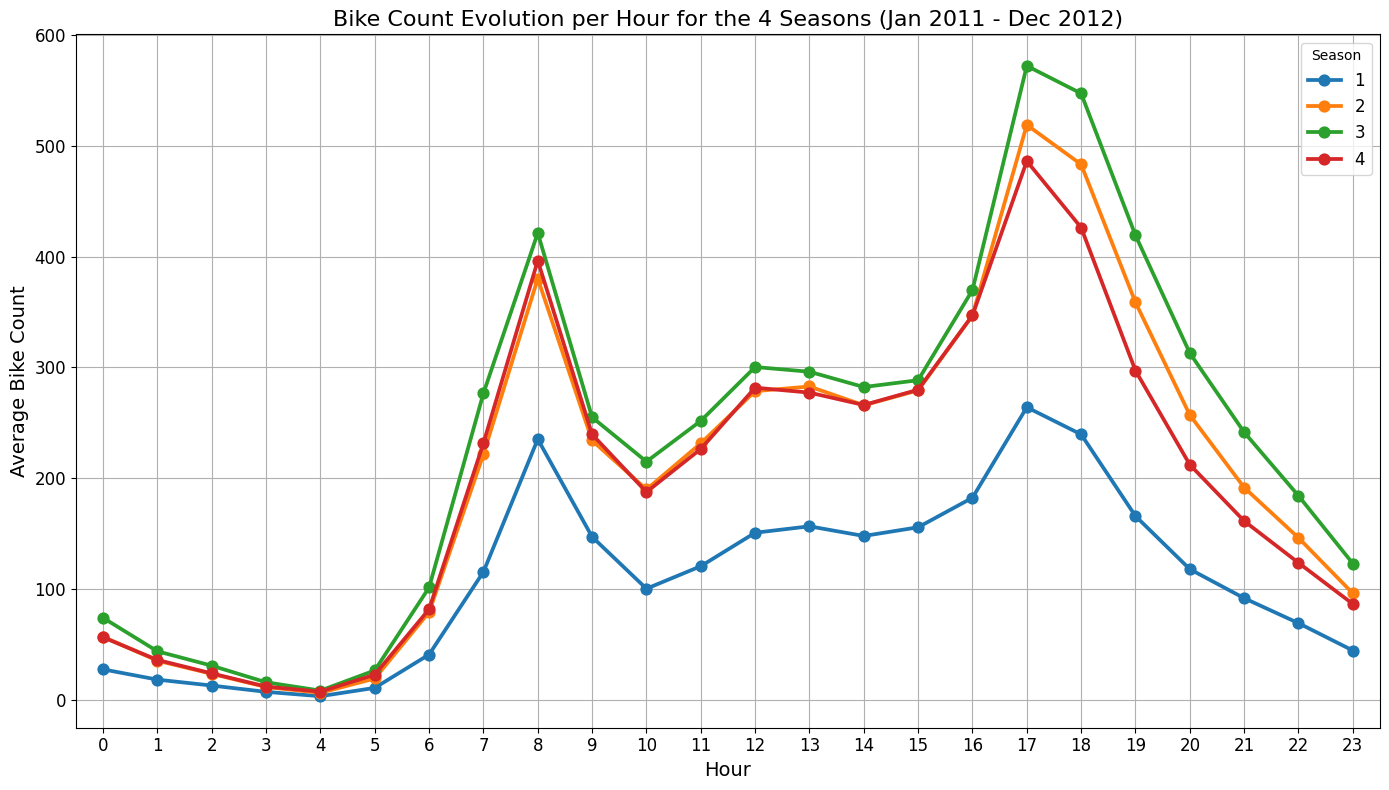

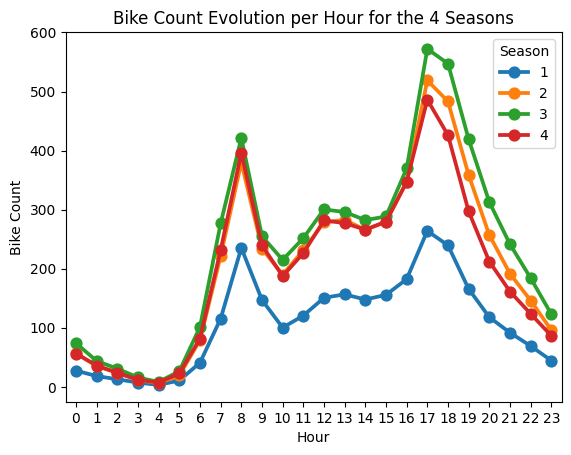

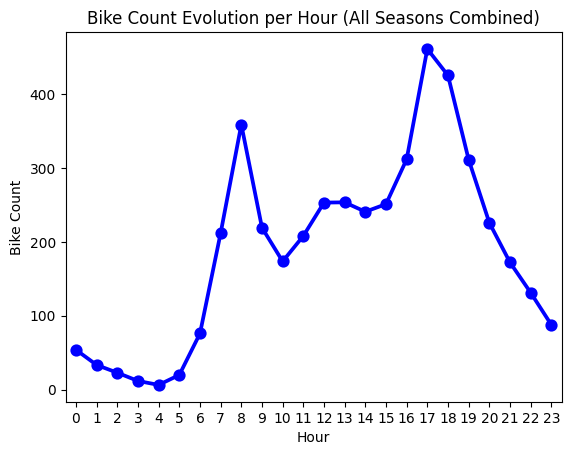

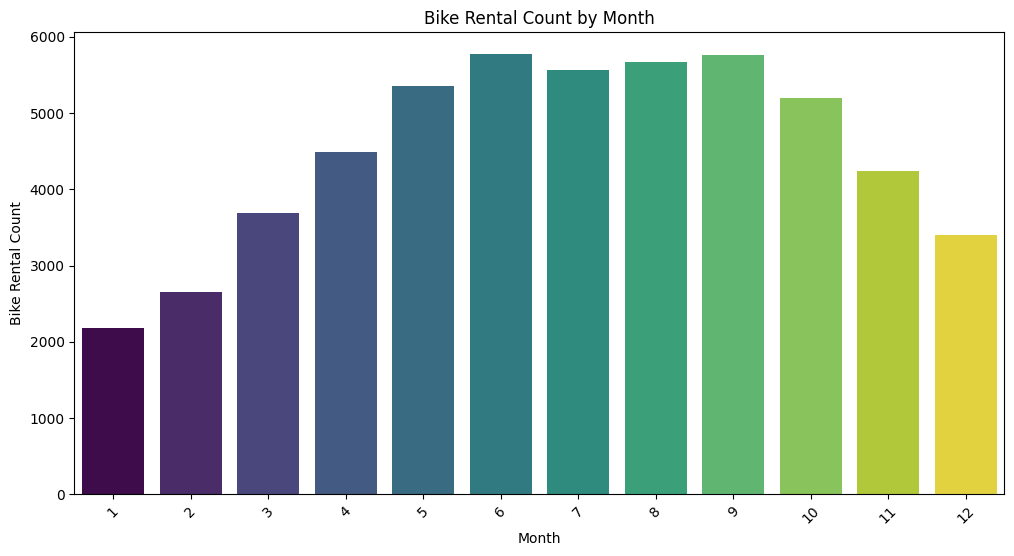

In [3]:

import matplotlib.pyplot as plt
import seaborn as sns

# Create necessary columns for date-related features
if 'month' not in day_df.columns:
    day_df['month'] = day_df['dteday'].dt.month
if 'weekday' not in day_df.columns:
    day_df['weekday'] = day_df['dteday'].dt.day_name()
if 'hr' in hour_df.columns:
    hour_df['hour'] = hour_df['hr']  # Rename hr to hour
if 'month' not in hour_df.columns:
    hour_df['month'] = hour_df['dteday'].dt.month
if 'weekday' not in hour_df.columns:
    hour_df['weekday'] = hour_df['dteday'].dt.day_name()


weekday_mapping = {
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
}
# Filtrer les données entre le 01/01/2011 et le 31/12/2012
# Filtrer les données entre le 01/01/2011 et le 31/12/2012
filtered_df = day_df[(day_df['dteday'] >= '2011-01-01') & (day_df['dteday'] <= '2012-12-31')]

# Extraire le mois et l'année
filtered_df['month'] = filtered_df['dteday'].dt.to_period('M')

# Appliquer le mapping
day_df['weekday'] = day_df['weekday'].map(weekday_mapping)
day_df['weekday'] = pd.Categorical(day_df['weekday'],
                                   categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                                   ordered=True)
print(day_df['weekday'].unique())
# Ensure 'weekday' column is in the correct order (Monday to Sunday)

hour_df['weekday'] = pd.Categorical(hour_df['weekday'],
                                    categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                                    ordered=True)

# Create weekend indicator
day_df['is_weekend'] = day_df['weekday'].isin(['Saturday', 'Sunday'])

# Feature Aggregation by season, month & day
featureAggregated_season = day_df.groupby("season")["cnt"].mean().reset_index()
print("Aggregation by season:")
print(featureAggregated_season)

featureAggregated_month = day_df.groupby("month")["cnt"].mean().reset_index()
print("Aggregation by month:")
print(featureAggregated_month)

# Fix aggregation logic for daily data
featureAggregated_day_weekday = day_df.groupby('weekday', observed=True)['cnt'].mean().reset_index()
print("Aggregation by weekday (daily data):")
print(featureAggregated_day_weekday)

# Aggregation for hourly data with updated logic
featureAggregated_hour_weekday = hour_df.groupby(["hour", "weekday"], observed=True)["cnt"].mean().reset_index()
print("Aggregation by hour and weekday in hour_df:")
print(featureAggregated_hour_weekday)
# Agréger les données par mois
monthly_bike_counts = filtered_df.groupby('month')['cnt'].sum().reset_index()

#Plotting
# Filtrer pour la plage de dates souhaitée
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])  # Assurez-vous que dteday est de type datetime
hour_df = hour_df[(hour_df['dteday'] >= '2011-01-01') & (hour_df['dteday'] <= '2012-12-31')]

# Calculer la moyenne des comptes par heure et par saison
hourly_season_data = hour_df.groupby(['hour', 'season'])['cnt'].mean().reset_index()
# Point plot pour les données horaires par saison
plt.figure(figsize=(14, 8))  # Ajustez la taille de la figure selon vos besoins
sns.pointplot(data=hourly_season_data, x='hour', y='cnt', hue='season', palette='tab10', errorbar=None)

# Ajout de titres et labels
plt.title('Bike Count Evolution per Hour for the 4 Seasons (Jan 2011 - Dec 2012)', fontsize=16)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Average Bike Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Season', fontsize=12)
plt.grid(True)  # Ajout de la grille pour améliorer la lisibilité
plt.tight_layout()  # Ajuste le layout pour éviter le chevauchement

# Afficher le graphique
plt.show()

# Point plot for hourly data by season
sns.pointplot(data=hour_df, x='hour', y='cnt', hue='season', palette='tab10', errorbar=None)
plt.title('Bike Count Evolution per Hour for the 4 Seasons')
plt.xlabel('Hour')
plt.ylabel('Bike Count')
plt.legend(title='Season')
plt.show()
#Point plot for hourly data without seasons
sns.pointplot(data=hour_df, x='hour', y='cnt', color='blue', errorbar=None)
plt.title('Bike Count Evolution per Hour (All Seasons Combined)')
plt.xlabel('Hour')
plt.ylabel('Bike Count')
plt.show()

# Bar plot for bike rental count by month
plt.figure(figsize=(12, 6))
sns.barplot(data=featureAggregated_month, x='month', y='cnt', hue='month', palette='viridis')
plt.title('Bike Rental Count by Month')
plt.xlabel('Month')
plt.ylabel('Bike Rental Count')
plt.xticks(rotation=45)
plt.legend([], frameon=False)  # Hide the legend
plt.show()

In [4]:
# Convert categorical variables to dummy variables (in day_df and hour_df)
categorical_columns = ["weathersit", "holiday", "workingday", "weekday", "month"]
day_df = pd.get_dummies(day_df, columns=categorical_columns, drop_first=True)
hour_df = pd.get_dummies(hour_df, columns=categorical_columns, drop_first=True)

# Check the final columns after transformation
print("Columns after transformation (day_df):")
print(day_df.columns)

print("Columns after transformation (hour_df):")
print(hour_df.columns)

Columns after transformation (day_df):
Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'temp', 'atemp', 'hum',
       'windspeed', 'casual', 'registered', 'cnt', 'is_weekend',
       'weathersit_2', 'weathersit_3', 'holiday_1', 'workingday_1',
       'weekday_Tuesday', 'weekday_Wednesday', 'weekday_Thursday',
       'weekday_Friday', 'weekday_Saturday', 'weekday_Sunday', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12'],
      dtype='object')
Columns after transformation (hour_df):
Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'temp', 'atemp',
       'hum', 'windspeed', 'casual', 'registered', 'cnt', 'hour_12', 'period',
       'hour', 'weathersit_2', 'weathersit_3', 'weathersit_4', 'holiday_1',
       'workingday_1', 'weekday_Tuesday', 'weekday_Wednesday',
       'weekday_Thursday', 'weekday_Friday', 'weekday_Saturday',
       'weekday_Sunday', 'month_2', 'month_3', 'month_4', 'mont

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.383e+31
Date:                Wed, 30 Oct 2024   Prob (F-statistic):               0.00
Time:                        13:55:14   Log-Likelihood:                 14929.
No. Observations:                 584   AIC:                        -2.984e+04
Df Residuals:                     574   BIC:                        -2.979e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.956e-12   5.82e-13      5.078      0.0

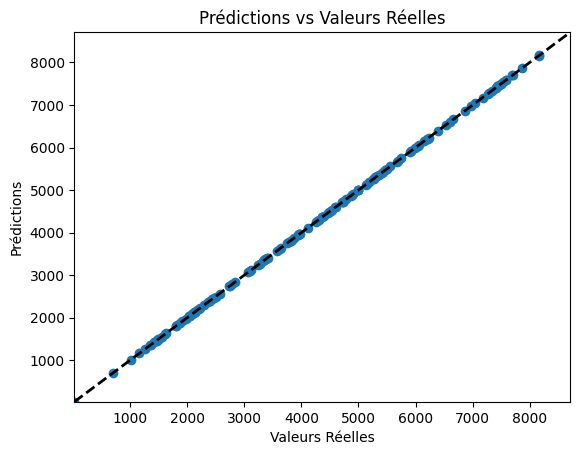

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.632e+31
Date:                Wed, 30 Oct 2024   Prob (F-statistic):               0.00
Time:                        13:55:14   Log-Likelihood:                 14644.
No. Observations:                 584   AIC:                        -2.927e+04
Df Residuals:                     577   BIC:                        -2.924e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.274e-13   6.74e-13     -0.337      0.7

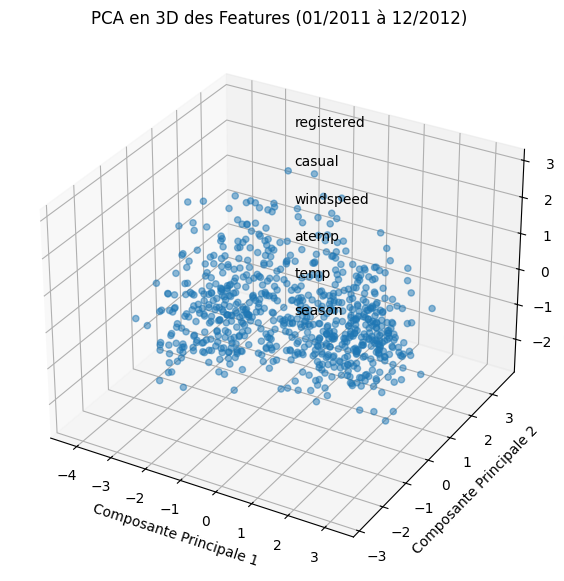

Explained variance ratio by the components:
[0.51793988 0.1699443  0.13028943]


In [11]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



# modélisation:
#1 la lrégression lineaire
# Définir les colonnes à utiliser pour X
columns_to_use = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']

# Ne conserver que les colonnes existantes
columns_to_use = [col for col in columns_to_use if col in day_df.columns]

# Définir X et Y pour la régression linéaire
X = day_df[columns_to_use]  # Inclure toutes les colonnes sélectionnées
Y = day_df['cnt']

# Ajouter une constante pour l'interception
X = sm.add_constant(X)

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Créer et entraîner le modèle de régression linéaire avec statsmodels
model = sm.OLS(Y_train, X_train).fit()

# Résumé du modèle
print(model.summary())

# Utiliser la première variable indépendante pour linregress
# Remarquez que ceci n'est pas la meilleure pratique pour une régression multiple
X_single = X_train['temp']  # Par exemple, on prend 'temp' comme variable indépendante

# Utiliser linregress
res = stats.linregress(X_single, Y_train)
print("Regression analysis (simple linear regression with 'temp'): ----------------")
print("Ordonnée à l'origine %1.2f, pente %1.2f, R^2 %1.2f" % (res.intercept, res.slope, res.rvalue**2))
print("-------------------------")

# Prédire sur le jeu de test
Y_pred = model.predict(X_test)

# Évaluer le modèle
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'Erreur quadratique moyenne (MSE) : {mse:.2f}')
print(f'Coefficient de détermination (R²) : {r2:.2f}')

# Visualiser les résultats
plt.scatter(Y_test, Y_pred)
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prédictions')
plt.title('Prédictions vs Valeurs Réelles')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=2)  # Ligne de référence
plt.xlim(Y.min(), Y.max())
plt.ylim(Y.min(), Y.max())
plt.show()

# Forward Method for feature selection
X = day_df[['season', 'temp', 'atemp', 'windspeed', 'casual','registered']]
y = day_df['cnt']

# Add a constant term for intercept
X = sm.add_constant(X)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = sm.OLS(Y_train, X_train).fit()

# Print the summary of the regression model
print(model.summary())

# Simple Linear Regression (with one feature, e.g., 'temp')
X_single = X_train[['temp']]  # Use 'temp' as the independent variable for simple regression (keep 2D)
res = stats.linregress(X_single.squeeze(), Y_train)  # Squeeze to get a 1D array for stats.linregress

print("Regression analysis (simple linear regression with 'temp'): ----------------")
print("Intercept: %1.2f, Slope: %1.2f, R^2: %1.2f" % (res.intercept, res.slope, res.rvalue**2))
print("-------------------------")

# Predict on the test set
Y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Coefficient of Determination (R²): {r2:.2f}')

# PCA Visualization
# Step 1: Create 'year_month' column for period representation
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df['year_month'] = day_df['dteday'].dt.to_period('M')  # Ensure 'dteday' is datetime

# Step 2: Filter data for the period 01/2011 to 12/2012
day_df_filtered = day_df[(day_df['year_month'] >= '2011-01') & (day_df['year_month'] <= '2012-12')]

# Step 3: Select features for PCA
features_for_pca = ['season', 'temp', 'atemp', 'windspeed', 'casual', 'registered']
X_pca = day_df_filtered[features_for_pca]

# Normalize the data before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca)

# Apply PCA with 3 components
pca = PCA(n_components=3)
X_pca_transformed = pca.fit_transform(X_scaled)

# Step 4: Create a 3D visualization with feature names
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the PCA points
scatter = ax.scatter(X_pca_transformed[:, 0],
                     X_pca_transformed[:, 1],
                     X_pca_transformed[:, 2],
                     alpha=0.5)

# Add feature names as annotations at the average position of each feature
for j, feature in enumerate(features_for_pca):
    ax.text(np.mean(X_pca_transformed[:, 0]),
            np.mean(X_pca_transformed[:, 1]),
            np.mean(X_pca_transformed[:, 2]) + j,  # Slightly offset the z position
            feature, fontsize=10)

# Titles and labels
ax.set_title('PCA en 3D des Features (01/2011 à 12/2012)')
ax.set_xlabel('Composante Principale 1')
ax.set_ylabel('Composante Principale 2')
ax.set_zlabel('Composante Principale 3')

# Show plot
plt.show()

# Step 5: Display explained variance ratio for each component
print("Explained variance ratio by the components:")
print(pca.explained_variance_ratio_)


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
365


C:\Users\syssa\AppData\Local\Temp\ipykernel_15708\666564701.py:29: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  day_df['date'] = pd.to_datetime(day_df['yr'].astype(str) + '-' + day_df['mnth'].astype(str).str.zfill(2) + '-01',


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Pour la valeur de régularisation L1 1e-07:
Mean Squared Error (MSE): 32691322.12
R² Score: -8.96
Caractéristiques avec coefficient nul (éliminées): []
Caractéristiques avec coefficient non nul (conservées): ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']
--------------------------------------------------
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Pour la valeur de régularisation L1 1e-06:
Mean Squared Error (MSE): 32691322.12
R² Score: -8.96
Caractéristiques avec coefficient nul (éliminées): []
Caractéristiques avec coefficient non nul (conservées): ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']
--------------------------------------------------
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/stepWARNING:tensorflow:6 out of the last 9 calls to <function TensorFlowTrainer.make_predict_function.<

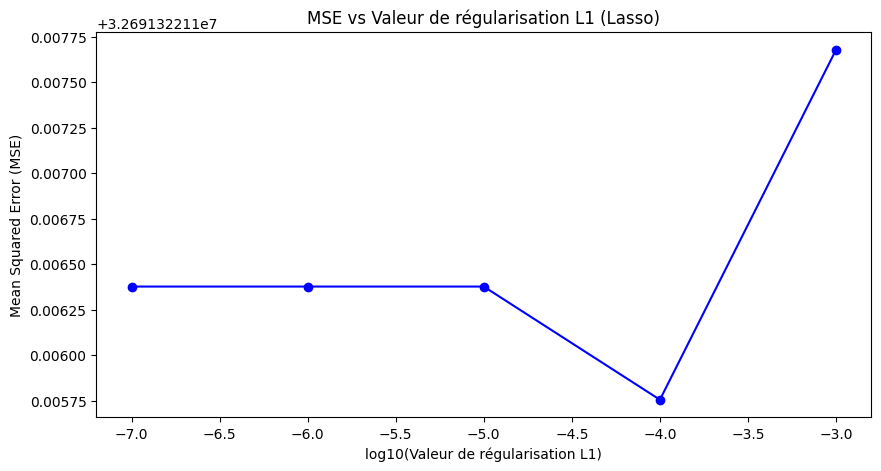

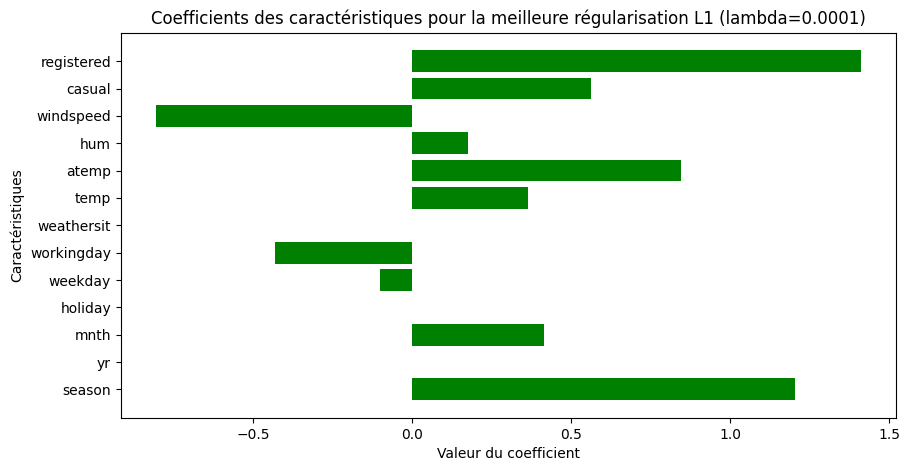

In [2]:

import numpy as np
import pandas as pd
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.regularizers import l1
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# LASSO (Régression pénalisée)
# Fixer la graine pour garantir la stabilité des résultats
def set_seed(seed=42):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    random.seed(seed)

set_seed()

# Charger le fichier CSV
day_df = pd.read_csv(r'C:\Users\syssa\PycharmProjects\premier projet\extracted_files\day.csv')

# Vérifier les valeurs manquantes avant le traitement
print(day_df.isna().sum())

# Création de la colonne 'date' à partir des colonnes 'yr' et 'mnth'
day_df['date'] = pd.to_datetime(day_df['yr'].astype(str) + '-' + day_df['mnth'].astype(str).str.zfill(2) + '-01',
                                errors='coerce')
print(day_df['date'].isna().sum())  # Vérification des NaN dans 'date'

# Liste des jours fériés (à personnaliser)
holidays_list = ['2011-01-01', '2012-12-25']

# Création des nouvelles colonnes
day_df['holiday'] = day_df['date'].dt.date.apply(lambda x: 1 if str(x) in holidays_list else 0)
day_df['weekday'] = day_df['date'].dt.weekday
day_df['workingday'] = day_df['weekday'].apply(lambda x: 1 if x < 5 else 0)

# Création de la colonne 'weathersit' (ajuster les conditions selon vos besoins)
day_df['weathersit'] = day_df['temp'].apply(lambda x: 1 if x < 15 else (2 if x < 30 else 3))

# Suppression des lignes contenant des NaN
day_df.dropna(inplace=True)

# Définition des caractéristiques (X) et de la cible (Y)
X = day_df[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit',
            'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']]
Y = day_df['cnt']

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Normalisation des caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Liste des valeurs L1 à tester
l1_values = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]

# Dictionnaire pour stocker les résultats
results = {}
feature_names = X.columns.tolist()

# Boucle pour tester chaque valeur de régularisation L1
for l1_value in l1_values:
    # Initialiser la graine avant chaque modèle pour garantir des résultats cohérents
    set_seed()

    # Construction du modèle avec régularisation L1
    model = Sequential([
        Input(shape=(X_train_scaled.shape[1],)),
        Dense(1, activation='linear', kernel_regularizer=l1(l1_value))
    ])

    # Compilation et entraînement du modèle
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)

    # Prédictions et évaluation du modèle
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Stockage des résultats et des coefficients
    weights, _ = model.layers[0].get_weights()
    results[l1_value] = {
        'MSE': mse,
        'R²': r2,
        'weights': weights.flatten()
    }

    # Affichage des caractéristiques avec coefficients nuls et non nuls
    zero_coeff_features = [feature_names[i] for i, coef in enumerate(weights.flatten()) if coef == 0]
    non_zero_coeff_features = [feature_names[i] for i, coef in enumerate(weights.flatten()) if coef != 0]

    print(f'Pour la valeur de régularisation L1 {l1_value}:')
    print(f'Mean Squared Error (MSE): {mse:.2f}')
    print(f'R² Score: {r2:.2f}')
    print(f'Caractéristiques avec coefficient nul (éliminées): {zero_coeff_features}')
    print(f'Caractéristiques avec coefficient non nul (conservées): {non_zero_coeff_features}')
    print('-' * 50)

# Graphique des MSE pour chaque valeur L1
plt.figure(figsize=(10, 5))
plt.plot(np.log10(l1_values), [results[l1]['MSE'] for l1 in l1_values], marker='o', color='blue')
plt.xlabel('log10(Valeur de régularisation L1)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs Valeur de régularisation L1 (Lasso)')
plt.show()

# Identification du meilleur modèle et affichage des coefficients
best_l1_value = min(results, key=lambda l1: results[l1]['MSE'])
best_weights = results[best_l1_value]['weights']

# Graphique des coefficients du meilleur modèle
plt.figure(figsize=(10, 5))
plt.barh(feature_names, best_weights, color='green')
plt.xlabel('Valeur du coefficient')
plt.ylabel('Caractéristiques')
plt.title(f'Coefficients des caractéristiques pour la meilleure régularisation L1 (lambda={best_l1_value})')
plt.show()

Training Accuracy: 99.32%
Test Accuracy: 98.65%

Classification Report (Test Set):
              precision    recall  f1-score   support

      Faible       1.00      1.00      1.00         1
     Moyenne       1.00      0.93      0.97        15
      Élevée       0.98      1.00      0.99        58

    accuracy                           0.99        74
   macro avg       0.99      0.98      0.99        74
weighted avg       0.99      0.99      0.99        74



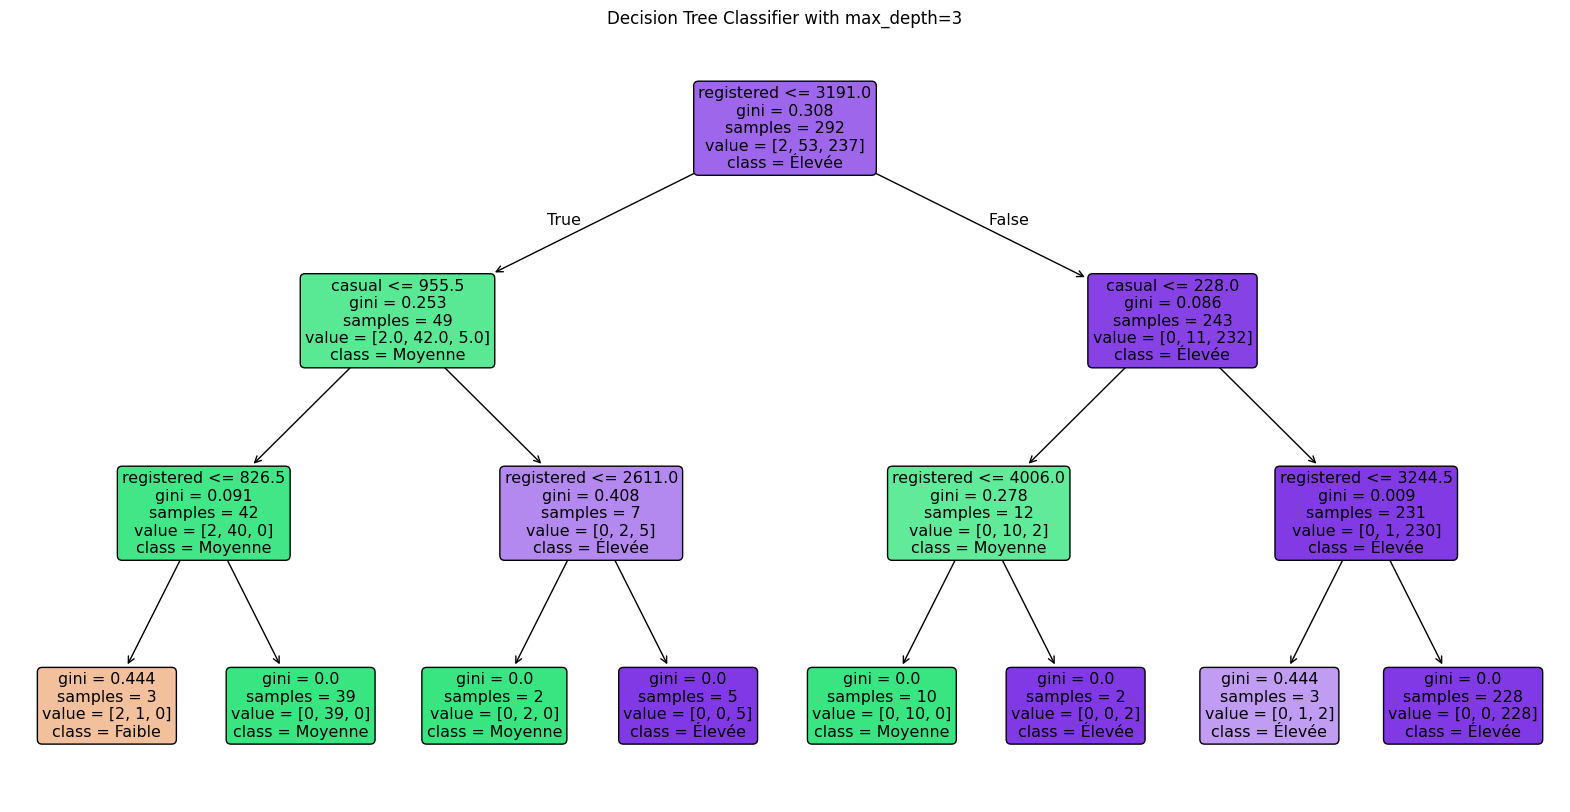

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Assurez-vous que 'dteday' est au bon format datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Filtrer les données pour la période 01/2011 à 12/2012
day_df_filtered = day_df[(day_df['dteday'] >= '2011-01-01') & (day_df['dteday'] <= '2012-12-31')]

# Sélectionner les features
X = day_df_filtered[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']]

# Créer des catégories pour la variable 'cnt' (par exemple faible, moyenne, élevée demande)
# Vous pouvez ajuster les seuils selon vos données.
bins = [0, 1000, 4000, day_df_filtered['cnt'].max()]
labels = ['Faible', 'Moyenne', 'Élevée']
day_df_filtered['cnt_category'] = pd.cut(day_df_filtered['cnt'], bins=bins, labels=labels, include_lowest=True)

# Variable cible (catégorielle)
Y = day_df_filtered['cnt_category']

# Diviser les données en ensembles d'entraînement et de test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Créer le classifieur de l'arbre de décision avec max_depth=3
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=3)

# Ajuster le modèle aux données d'entraînement
dt_classifier.fit(X_train, y_train)

# Faire des prédictions
y_pred_train = dt_classifier.predict(X_train)
y_pred_test = dt_classifier.predict(X_test)

# Évaluer le modèle
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

# Afficher les métriques d'évaluation
print(f"Training Accuracy: {accuracy_train * 100:.2f}%")
print(f"Test Accuracy: {accuracy_test * 100:.2f}%")
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_test, target_names=labels))

# Visualiser l'arbre de décision avec max_depth limité
plt.figure(figsize=(20, 10))  # Ajuster la taille de la figure
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=labels, rounded=True)
plt.title('Decision Tree Classifier with max_depth=3')
plt.show()

Random Forest Training MSE: 3944.19
Random Forest Test MSE: 22641.28
Random Forest Test Accuracy (R²): 0.99


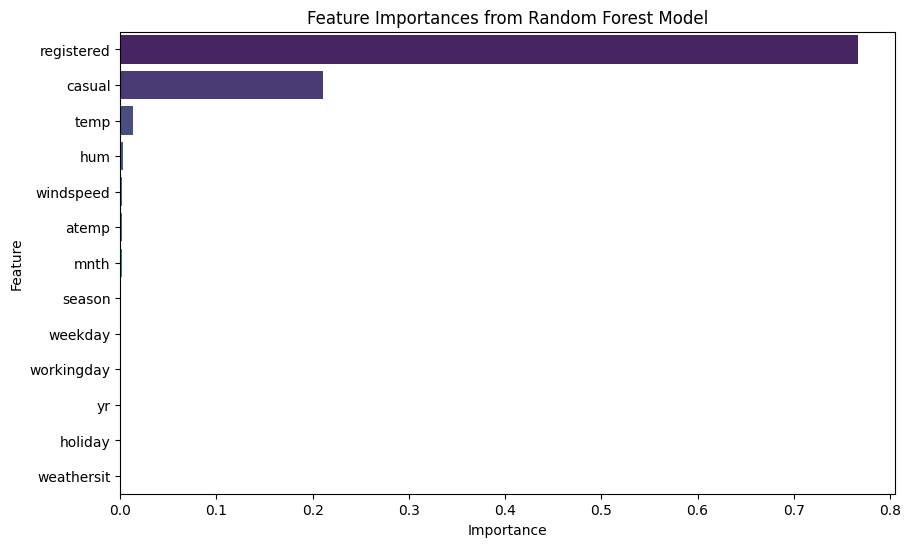

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Step 1: Convert 'dteday' to datetime format if not already
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Step 2: Filter data for the period 01/2011 to 12/2012
day_df_filtered = day_df[(day_df['dteday'] >= '2011-01-01') & (day_df['dteday'] <= '2012-12-31')]

# Step 3: Select the features and target variable
X = day_df_filtered[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']]  # Selected features
Y = day_df_filtered['cnt']  # Target variable

# Step 4: Split the data into training and test sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Step 5: Create and fit the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)

# Step 6: Make predictions
Y_pred_train = rf_model.predict(X_train)
Y_pred_test = rf_model.predict(X_test)

# Step 7: Evaluate the model
mse_train = mean_squared_error(Y_train, Y_pred_train)
mse_test = mean_squared_error(Y_test, Y_pred_test)
accuracy_test = rf_model.score(X_test, Y_test)

# Print evaluation metrics
print(f"Random Forest Training MSE: {mse_train:.2f}")
print(f"Random Forest Test MSE: {mse_test:.2f}")
print(f"Random Forest Test Accuracy (R²): {accuracy_test:.2f}")

# Step 8: Visualize feature importances
importances = rf_model.feature_importances_
features = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', hue='Feature', data=importance_df, palette='viridis', legend=False)
plt.title('Feature Importances from Random Forest Model')
plt.show()

Shape of X: (366, 29)
Shape of y: (366,)
Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 36810704.0000 - val_loss: 33794488.0000
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 36804404.0000 - val_loss: 33789348.0000
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 36798408.0000 - val_loss: 33782824.0000
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 36790164.0000 - val_loss: 33773556.0000
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 36778408.0000 - val_loss: 33760060.0000
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 36761440.0000 - val_loss: 33740272.0000
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 36736636.0000 - val_loss: 33711240.0000
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 36700504.0000 - val_loss: 33669084.0000
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 36648076.0000 - val_loss: 33608100.0000
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 36572784.0000 - val_loss:

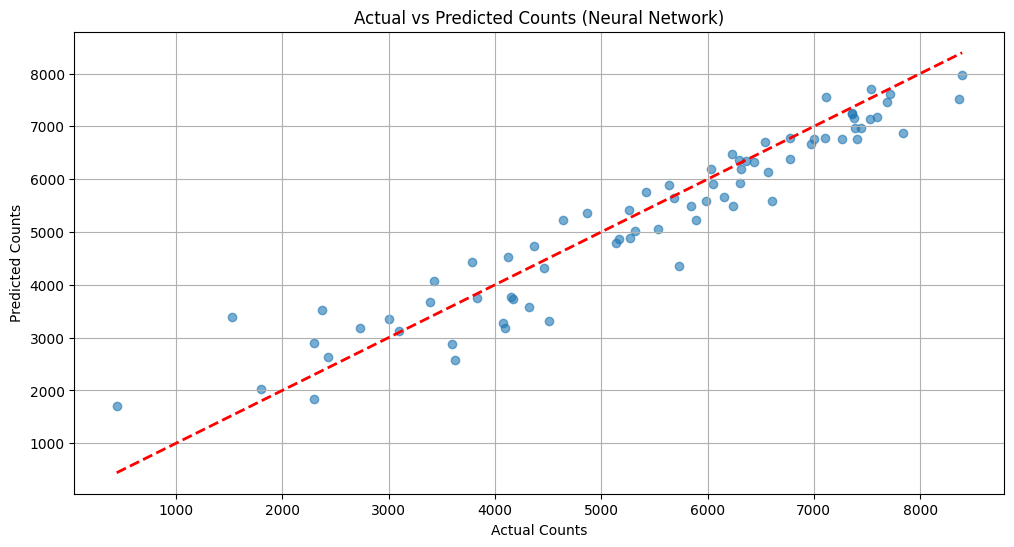

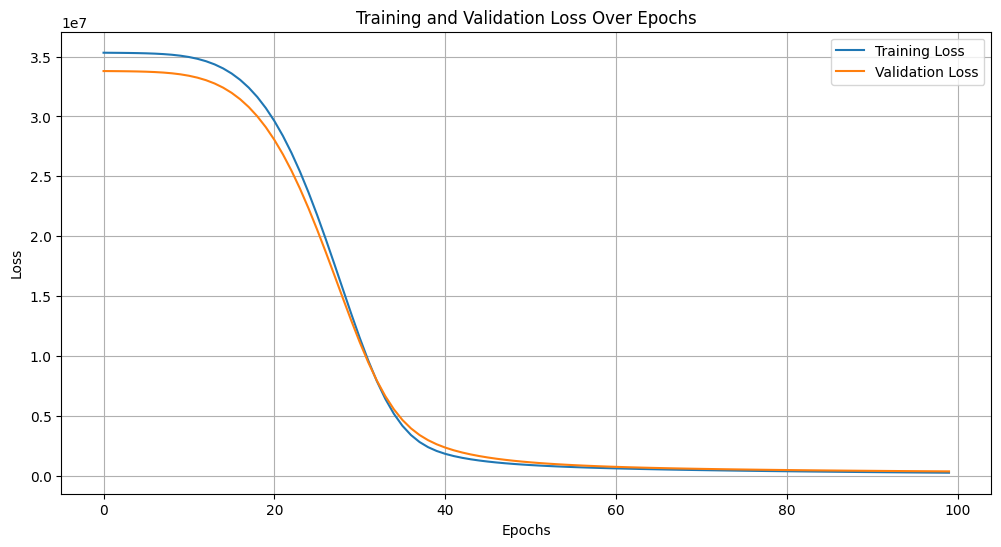

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow import keras
from tensorflow.keras import layers

# Drop rows with NaN values in specific columns
day_df.dropna(subset=['cnt', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered'], inplace=True)

# Define X (features) and y (target variable)
X = day_df[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']]
y = day_df['cnt']

# One-Hot Encoding for categorical features
X = pd.get_dummies(X, columns=['season', 'weathersit', 'mnth', 'weekday'], drop_first=True)

# Verify the shapes
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

# Align X and y to ensure they have the same number of samples
if X.shape[0] != y.shape[0]:
    print("Mismatch in sample sizes! Aligning X and y...")
    min_length = min(X.shape[0], y.shape[0])
    X = X.iloc[:min_length]
    y = y.iloc[:min_length]

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the Sequential Neural Network
model = keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),  # Input shape
    layers.Dense(64, activation='relu'),  # First hidden layer
    layers.Dense(32, activation='relu'),  # Second hidden layer
    layers.Dense(16, activation='relu'),  # Additional intermediate layer
    layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Make predictions
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Print evaluation metrics
print(f"Neural Network Training MSE: {mse_train:.2f}")
print(f"Neural Network Test MSE: {mse_test:.2f}")
print(f"Neural Network Training R²: {r2_train:.2f}")
print(f"Neural Network Test R²: {r2_test:.2f}")

# Visualize actual vs predicted values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_test, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)
plt.xlabel('Actual Counts')
plt.ylabel('Predicted Counts')
plt.title('Actual vs Predicted Counts (Neural Network)')
plt.grid()
plt.show()

# Optional: Plotting training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

Epoch 1/50


C:\Users\syssa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.1926 - val_loss: 0.0453
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0255 - val_loss: 0.0386
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0149 - val_loss: 0.0288
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0128 - val_loss: 0.0282
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0121 - val_loss: 0.0279
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0118 - val_loss: 0.0281
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0117 - val_loss: 0.0282
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0117 - val_loss: 0.0283
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0117 - val_loss: 0.0283
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0117 - val_loss: 0.0282
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0117 - val_loss: 0.0282
Epoch 12/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0117 - val_l

C:\Users\syssa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.2331 - val_loss: 0.0324
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0289 - val_loss: 0.0399
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0170 - val_loss: 0.0276
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0141 - val_loss: 0.0279
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0127 - val_loss: 0.0257
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0119 - val_loss: 0.0252
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0115 - val_loss: 0.0249
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0113 - val_loss: 0.0248
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0113 - val_loss: 0.0247
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0113 - val_loss: 0.0247
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0112 - val_loss: 0.0246
Epoch 12/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0112 - val_l

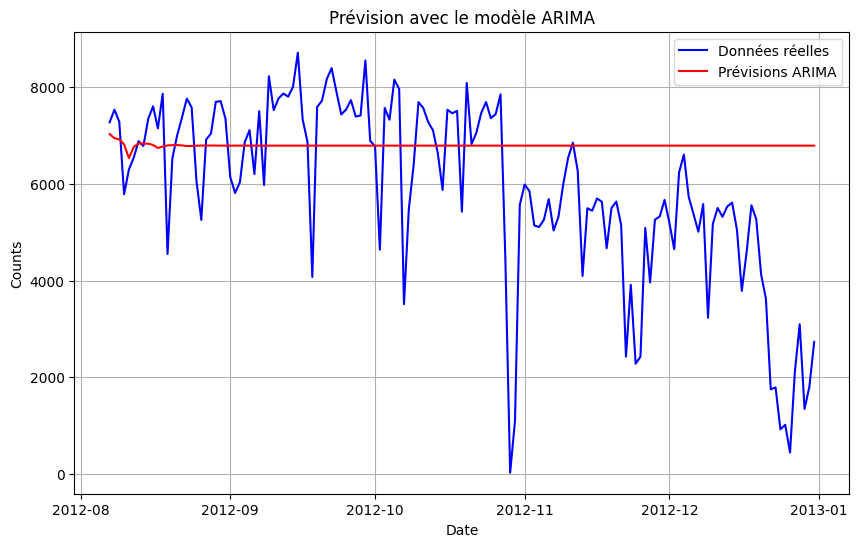

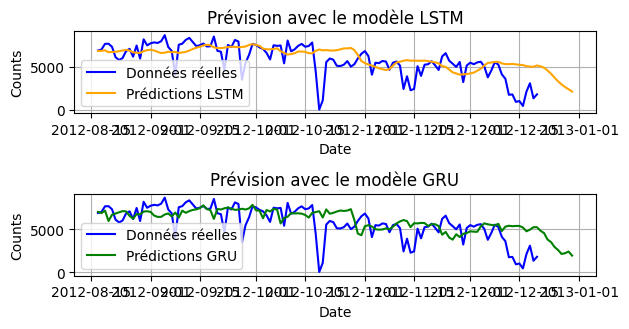

In [6]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam

#les modéles de la série temporelle ARIMA, LSTM & GRU
# Charger le fichier CSV
day_df = pd.read_csv(r'C:\Users\syssa\PycharmProjects\premier projet\extracted_files\day.csv')

# Assurez-vous que votre colonne de dates est bien au format datetime
if 'dteday' in day_df.columns:
    day_df['dteday'] = pd.to_datetime(day_df['dteday'])
    day_df.set_index('dteday', inplace=True)  # Définir l'index avec la colonne de dates
else:
    print("'dteday' n'existe pas dans day_df.")

# Définir X (features) et y (variable cible)
X = day_df[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit',
             'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']]
y = day_df['cnt']

# Normalisation des données
scaler_Y = MinMaxScaler()
data_scaled = scaler_Y.fit_transform(day_df[['cnt']])  # Normalisation de la variable cible 'cnt'

# Préparation des données pour LSTM/GRU
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Paramètres
time_step = 10  # Nombre de pas de temps pour la fenêtre
data_size = len(data_scaled)
train_size = int(data_size * 0.8)
train, test = data_scaled[:train_size], data_scaled[train_size:]

# Création des ensembles d'entraînement et de test
X_train, y_train = create_dataset(train, time_step)
X_test, y_test = create_dataset(test, time_step)

# Reshape pour le modèle LSTM et GRU
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Fonction pour construire le modèle LSTM
def build_model_lstm():
    model = models.Sequential()
    model.add(layers.LSTM(units=30, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(layers.LSTM(units=30))
    model.add(layers.Dense(1))
    model.compile(optimizer=Adam(learning_rate=1e-3), loss='mean_squared_error')
    return model

# Fonction pour construire le modèle GRU
def build_model_gru():
    model = models.Sequential()
    model.add(layers.GRU(units=30, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(layers.GRU(units=30))
    model.add(layers.Dense(1))
    model.compile(optimizer=Adam(learning_rate=1e-3), loss='mean_squared_error')
    return model

# Créer et entraîner le modèle LSTM
lstm_model = build_model_lstm()
lstm_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=1)

# Prédictions avec le modèle LSTM
lstm_predictions = lstm_model.predict(X_test)
lstm_predictions = scaler_Y.inverse_transform(lstm_predictions).flatten()

# Ajustement de la longueur pour le calcul de la MSE
min_length = min(len(y_test[time_step:]), len(lstm_predictions))
lstm_mse = mean_squared_error(y_test[time_step:][:min_length], lstm_predictions[:min_length])
print(f"Meilleur LSTM MSE: {lstm_mse:.2f}")

# Créer et entraîner le modèle GRU
gru_model = build_model_gru()
gru_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=1)

# Prédictions avec le modèle GRU
gru_predictions = gru_model.predict(X_test)
gru_predictions = scaler_Y.inverse_transform(gru_predictions).flatten()

# Ajustement de la longueur pour le calcul de la MSE
min_length_gru = min(len(y_test[time_step:]), len(gru_predictions))
gru_mse = mean_squared_error(y_test[time_step:][:min_length_gru], gru_predictions[:min_length_gru])
print(f"Meilleur GRU MSE: {gru_mse:.2f}")

# Modèle ARIMA
arima_model = ARIMA(train.flatten(), order=(5, 1, 0))  # Ajustez les paramètres d'ordre si nécessaire
arima_model_fit = arima_model.fit()

# Générer les prévisions avec ARIMA pour l'ensemble de test
arima_forecast = arima_model_fit.forecast(steps=len(test))

# Ajustez test pour qu'il corresponde à la longueur de arima_forecast
min_length_arima = min(len(test), len(arima_forecast))
test_resized = test[:min_length_arima]  # Redimensionne test pour correspondre à arima_forecast

# Inversez la normalisation pour les prévisions ARIMA et les valeurs réelles
arima_forecast_inverse = scaler_Y.inverse_transform(arima_forecast.reshape(-1, 1))
test_inverse = scaler_Y.inverse_transform(test_resized.reshape(-1, 1))

# Calcul du MSE
arima_mse = mean_squared_error(test_inverse, arima_forecast_inverse)
print(f"Meilleur ARIMA MSE: {arima_mse:.2f}")

# Création correcte de 'forecast_index' pour correspondre à la taille d'arima_forecast
forecast_index = day_df.index[train_size:train_size + len(arima_forecast)]

# Visualisation des résultats
plt.figure(figsize=(10, 6))
plt.plot(day_df.index[train_size:], scaler_Y.inverse_transform(test.reshape(-1, 1)),
         label='Données réelles', color='blue')
plt.plot(forecast_index, arima_forecast_inverse,
         label='Prévisions ARIMA', color='red')
plt.title('Prévision avec le modèle ARIMA')
plt.xlabel('Date')
plt.ylabel('Counts')
plt.legend()
plt.grid()
plt.show()
# Synchronisation des longueurs pour LSTM
lstm_index = day_df.index[train_size + time_step: train_size + time_step + len(lstm_predictions)]

# Affichage du graphique LSTM
plt.subplot(3, 1, 2)
plt.plot(day_df.index[train_size + time_step: train_size + time_step + len(y_test[time_step:])],
         scaler_Y.inverse_transform(y_test[time_step:].reshape(-1, 1)),
         label='Données réelles', color='blue')
plt.plot(lstm_index,
         lstm_predictions[:len(lstm_index)],
         label='Prédictions LSTM', color='orange')
plt.title('Prévision avec le modèle LSTM')
plt.xlabel('Date')
plt.ylabel('Counts')
plt.legend()
plt.grid()

# Synchronisation des longueurs pour GRU
gru_index = day_df.index[train_size + time_step: train_size + time_step + len(gru_predictions)]

# Affichage du graphique GRU
plt.subplot(3, 1, 3)
plt.plot(day_df.index[train_size + time_step: train_size + time_step + len(y_test[time_step:])],
         scaler_Y.inverse_transform(y_test[time_step:].reshape(-1, 1)),
         label='Données réelles', color='blue')
plt.plot(gru_index,
         gru_predictions[:len(gru_index)],
         label='Prédictions GRU', color='green')
plt.title('Prévision avec le modèle GRU')
plt.xlabel('Date')
plt.ylabel('Counts')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()